## Global Cost of Living Analysis 2024: Insights for Strategic Investment Decisions


## Business Understanding
- The dataset provides various indices related to the cost of living across 121 countries for the year 2024. These indices include the Cost of Living Index, Rent Index, Groceries Index, Restaurant Price Index, and Local Purchasing Power Index. Investors can use this data to understand the economic environment of different countries, which can influence investment decisions, particularly in sectors like real estate, retail, and hospitality.

#  Overview
- The primary objective is to identify the top 10 countries where investors can potentially invest based on the Rent Index, Groceries Index, Restaurant Price Index, and Local Purchasing Power Index. The goal is to find countries that offer a favorable balance between cost and purchasing power, which can lead to higher returns on investment.

# Data Understanding
- The data used for the analysis is from [Kaggle](https://www.kaggle.com/datasets/myrios/cost-of-living-index-by-country-by-number-2024/data) giving the a cvs data cost of living index by country
- The dataset includes the following indices:

- Rent Index: Measures the cost of renting properties.
- Groceries Index: Reflects the cost of groceries.
Restaurant Price Index: Indicates the cost of dining out.
- Local Purchasing Power Index: Represents the relative purchasing power of a country's average income.
- cost of living index: Represents the relative day to day usage of people in the country

**Inserting Relevant Libraries to help in analysing the data**

We begin by importing the necessary libraries for data manipulation, analysis, and visualization.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
import sqlite3
import statsmodels.api as sm
import warnings
import scipy.stats as stats

warnings.filterwarnings('ignore')

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

**Data Exploration**


We begin by examining a Few rows of the cost of living index by countries cvs to helps us understand the structure of the dataset and the type of information it holds. By inspecting the initial rows, we can identify the columns available and check for any potential issues with the data.

In [48]:

file_path = 'Cost_of_Living_Index_by_Country_2024.csv'
data = pd.read_csv(file_path, encoding='ascii')
data.head()


,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


## Data Cleaning and Exploration

In [49]:
# Check for missing values
print("\
Missing Values:")
print(df.isnull().sum())



Missing Values:
Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
Cost_Category                     0
Rent_Category                     0
High_COL                          0
dtype: int64


- The data provided has no missing values from the keys provided

In [50]:
# Display summary statistics
print("\
Summary Statistics:")
print(df.describe())

Summary Statistics:
             Rank  Cost of Living Index  Rent Index  \
count  121.000000            121.000000  121.000000   
mean    61.000000             43.555372   16.052893   
std     35.073732             16.147574   11.412267   
min      1.000000             18.800000    2.400000   
25%     31.000000             30.200000    8.500000   
50%     61.000000             39.500000   12.400000   
75%     91.000000             52.800000   20.100000   
max    121.000000            101.100000   67.200000   

       Cost of Living Plus Rent Index  Groceries Index  \
count                      121.000000       121.000000   
mean                        30.357851        44.228926   
std                         13.263721        17.055109   
min                         11.100000        17.500000   
25%                         19.800000        31.600000   
50%                         27.000000        40.500000   
75%                         37.000000        53.700000   
max                 

-  The summary provides a general view of the mean , standard deviation , quartile and interquartile , min and max of the dataset provided

**Data Classification**
- Data classification in this context involves categorizing countries based on their Cost of Living Index into distinct groups: They include Very Low, Low, Moderate, High and Very High. This classification is effective in determining the relationship of the cost of living within the countries thereby enhancing comparative evaluation of economic status of world countries.

In [51]:

df = pd.read_csv('Cost_of_Living_Index_by_Country_2024.csv', encoding='ascii')
def classify_cost_of_living(index):
    if index < 40:
        return 'Very Low'
    elif 40 <= index < 60:
        return 'Low'
    elif 60 <= index < 80:
        return 'Moderate'
    elif 80 <= index < 100:
        return 'High'
    else:
        return 'Very High'
df['Cost_Category'] = df['Cost of Living Index'].apply(classify_cost_of_living)

print(df[['Country', 'Cost of Living Index', 'Cost_Category']].head(10))
category_counts = df['Cost_Category'].value_counts().sort_index()
print("\
Number of countries in each category:")
print(category_counts)





             Country  Cost of Living Index Cost_Category
0        Switzerland                 101.1     Very High
1            Bahamas                  85.0          High
2            Iceland                  83.0          High
3          Singapore                  76.7      Moderate
4           Barbados                  76.6      Moderate
5             Norway                  76.0      Moderate
6            Denmark                  72.3      Moderate
7  Hong Kong (China)                  70.8      Moderate
8      United States                  70.4      Moderate
9          Australia                  70.2      Moderate
Number of countries in each category:
Cost_Category
High          2
Low          36
Moderate     21
Very High     1
Very Low     61
Name: count, dtype: int64


- Show a representation of the dataset using the cost of living into distinct groups that group the data from very low which ranges from 0 to 40 , Low which ranges from 41 to 60 , Moderate ranges from 61 to 80 , High ranges from 81 to 100 and very high that ranges from 101 to beyond.

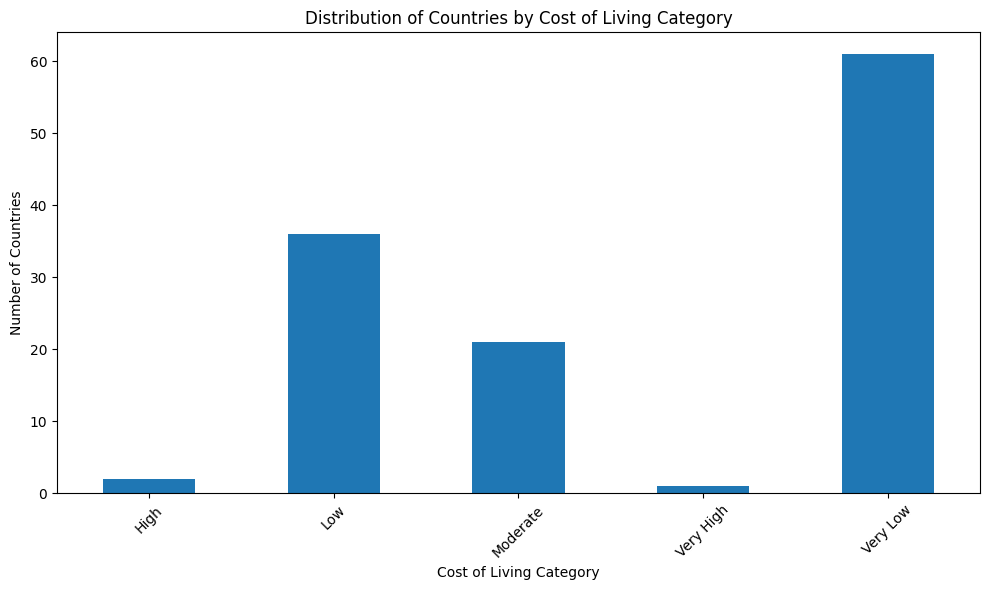

In [52]:
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Countries by Cost of Living Category')
plt.xlabel('Cost of Living Category')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- A majority of countries are in the Very Low and Low categories meaning that the majority of countries are actually cheap to live in.
- The number of countries categorized as “Moderate” is relatively less.
- Only a handful of countries fall into the “High” or ‘Very High’ categories when it comes to the cost of living.
- This visualization  is useful in explaining worldwide cost of living by depicting which categories are more widespread in countries.

In [53]:

def classify_rent_index(index):
    if index < 20:
        return 'Very Low'
    elif 20 <= index < 40:
        return 'Low'
    elif 40 <= index < 60:
        return 'Moderate'
    elif 60 <= index < 80:
        return 'High'
    else:
        return 'Very High'


df['Rent_Category'] = df['Rent Index'].apply(classify_rent_index)


print(df[['Country', 'Rent Index', 'Rent_Category']].head())

       Country  Rent Index Rent_Category
0  Switzerland        46.5      Moderate
1      Bahamas        36.7           Low
2      Iceland        39.2           Low
3    Singapore        67.2          High
4     Barbados        19.0      Very Low


This classification helps in visualizing and analyzing rent costs across different countries, making it easier to compare and group countries based on their rental market conditions.

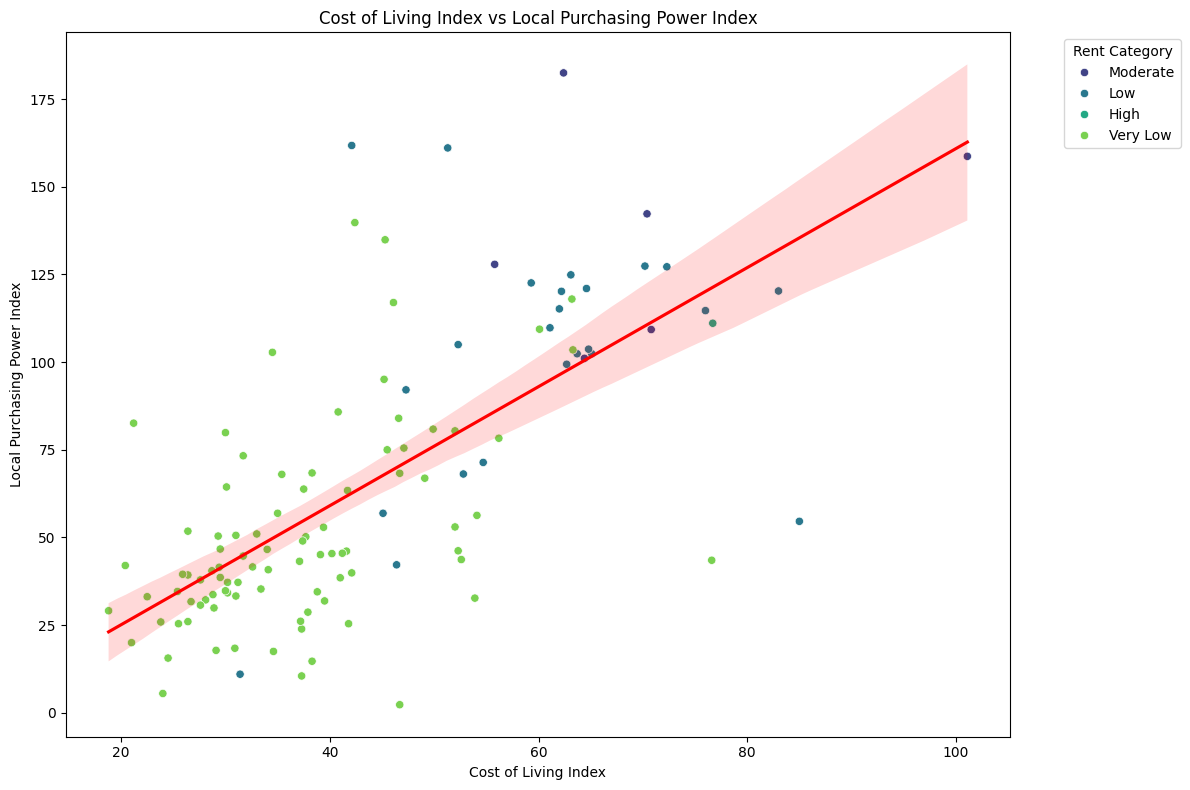

Correlation between Cost of Living Index and Local Purchasing Power Index: 0.69
Top 5 countries with highest Local Purchasing Power Index:
          Country  Local Purchasing Power Index  Cost of Living Index
19     Luxembourg                         182.5                  62.4
51         Kuwait                         161.8                  42.1
36          Qatar                         161.1                  51.3
0     Switzerland                         158.7                 101.1
8   United States                         142.3                  70.4


In [54]:

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Cost of Living Index', y='Local Purchasing Power Index', hue='Rent_Category', palette='viridis')

plt.title('Cost of Living Index vs Local Purchasing Power Index')
plt.xlabel('Cost of Living Index')
plt.ylabel('Local Purchasing Power Index')
sns.regplot(data=df, x='Cost of Living Index', y='Local Purchasing Power Index', scatter=False, color='red')
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

correlation = df['Cost of Living Index'].corr(df['Local Purchasing Power Index'])
print(f"Correlation between Cost of Living Index and Local Purchasing Power Index: {correlation:.2f}")

top_5_purchasing_power = df.nlargest(5, 'Local Purchasing Power Index')[['Country', 'Local Purchasing Power Index', 'Cost of Living Index']]
print("\
Top 5 countries with highest Local Purchasing Power Index:")
print(top_5_purchasing_power)

- This  graph establishes a link between the cost of living in a particular country and purchasing power of the people. This means that a higher value for the purchasing power with a low cost of living means high affordability.
- Investors can use this data to identify countries with favorable economic conditions for business expansion or relocation.



In [55]:

X = df[['Rent Index', 'Cost of Living Plus Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']]
y = df['Cost of Living Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Squared Error: 0.005149489335781634
R-squared: 0.999983298808485


- The linear regression model has been successfully trained and evaluated. Here are the results:

Mean Squared Error: 0.005149489335781885

R-squared: 0.999983298808485

The R-squared value is very close to 1, indicating that the model explains a large portion of the variance in the Cost of Living Index.

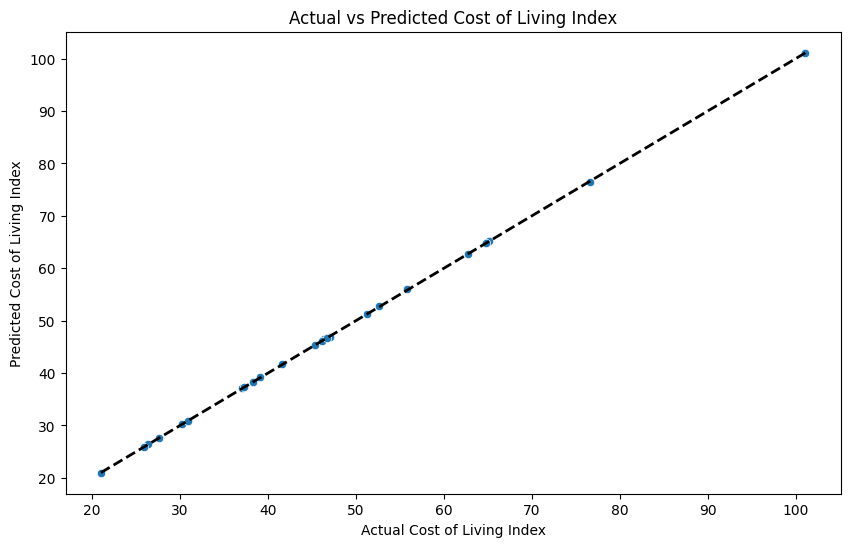

Modeling complete.


In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Cost of Living Index')
plt.ylabel('Predicted Cost of Living Index')
plt.title('Actual vs Predicted Cost of Living Index')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

print("Modeling complete.")

- The plot shows a strong correlation between the actual and predicted values, which aligns with the high R-squared value.

**Findings**
- Predictive Power: The model's high R-squared value (0.999983298808485
) indicates that the selected factors (Rent Index, Cost of Living Plus Rent Index, Groceries Index, Restaurant Price Index, and Local Purchasing Power Index) are excellent predictors of the overall Cost of Living Index.

- Economic Indicators:This is a key indicatotor that has affected the cost of living amongst contries. Businesses and policymakers can focus on these areas to understand or influence living costs.

- Market Analysis: Companies considering international expansion can use this model to predict and compare living costs across different countries, aiding in decision-making for market entry, pricing strategies, or employee compensation packages.


- Investment Decisions: Investors can leverage these insights for real estate investments or when considering the economic stability of different countries.

**Frequency**

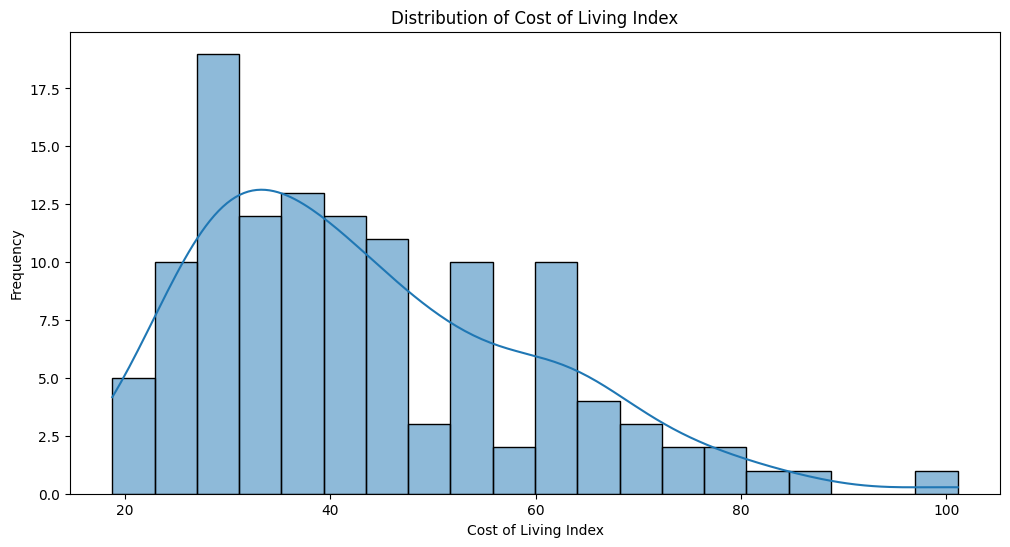

In [57]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Cost of Living Index'], bins=20, kde=True)
plt.title('Distribution of Cost of Living Index')
plt.xlabel('Cost of Living Index')
plt.ylabel('Frequency')
plt.show()




- Central tendency: The peak of the distribution indicates the most common Cost of Living Index values.

- Spread: The width of the histogram shows the range of Cost of Living Index values across countries.

- Outliers: Countries with exceptionally high or low Cost of Living Index values can be identified at the extremes.
 expansion opportunities.

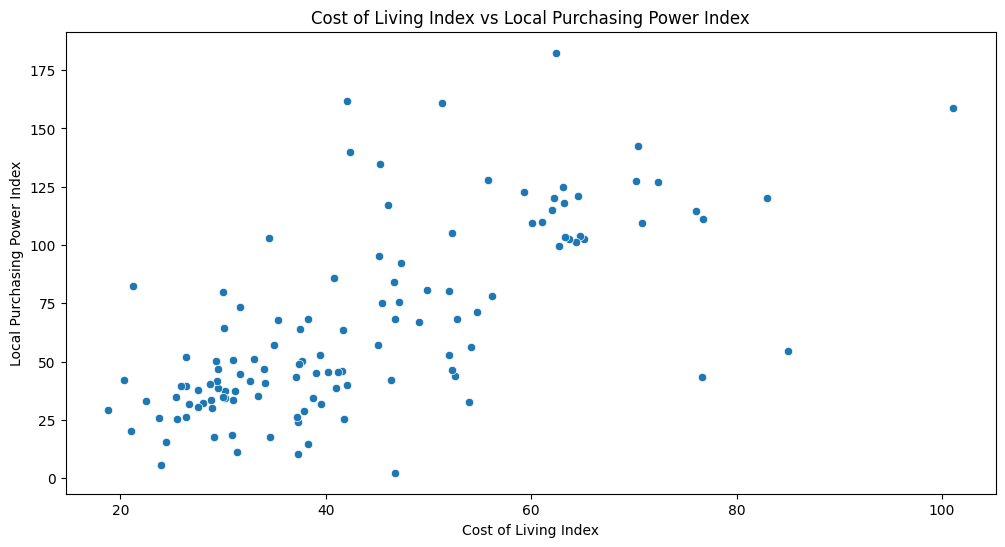

In [58]:
# Create a scatter plot of Cost of Living Index vs Local Purchasing Power Index
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Cost of Living Index', y='Local Purchasing Power Index', data=df)
plt.title('Cost of Living Index vs Local Purchasing Power Index')
plt.xlabel('Cost of Living Index')
plt.ylabel('Local Purchasing Power Index')
plt.show()

- Correlation: The scatter plot makes it easy to see if there is any relationship between the Cost of Living Index and the Local Purchasing Power Index. This would imply that as the general inflation rises, the ability to purchase more goods and services also rises, and as the ability to purchase goes down, so does the general inflation.
- Clusters: It can show groups of countries with similar economic features. For instance, group of countries characterized by high cost of living and high purchasing power parity might comprise one cluster.
- Outliers: In general, it is easy to identify such observations that may be considered as outliers. These are countries that fall outside the ordinary and may have special economic characteristics.
- Trend Analysis: From the analysis of the overall pattern, the businesses and the policy makers can get an insight of what the general outlook of the economy will look like and therefore be in a position to make informed decisions.
-  Comparative Analysis: It makes it easier to compare the relative positioning of different countries and determine the countries with a balanced or unbalanced cost of living and purchasing power.

**Corelation Heat Map**


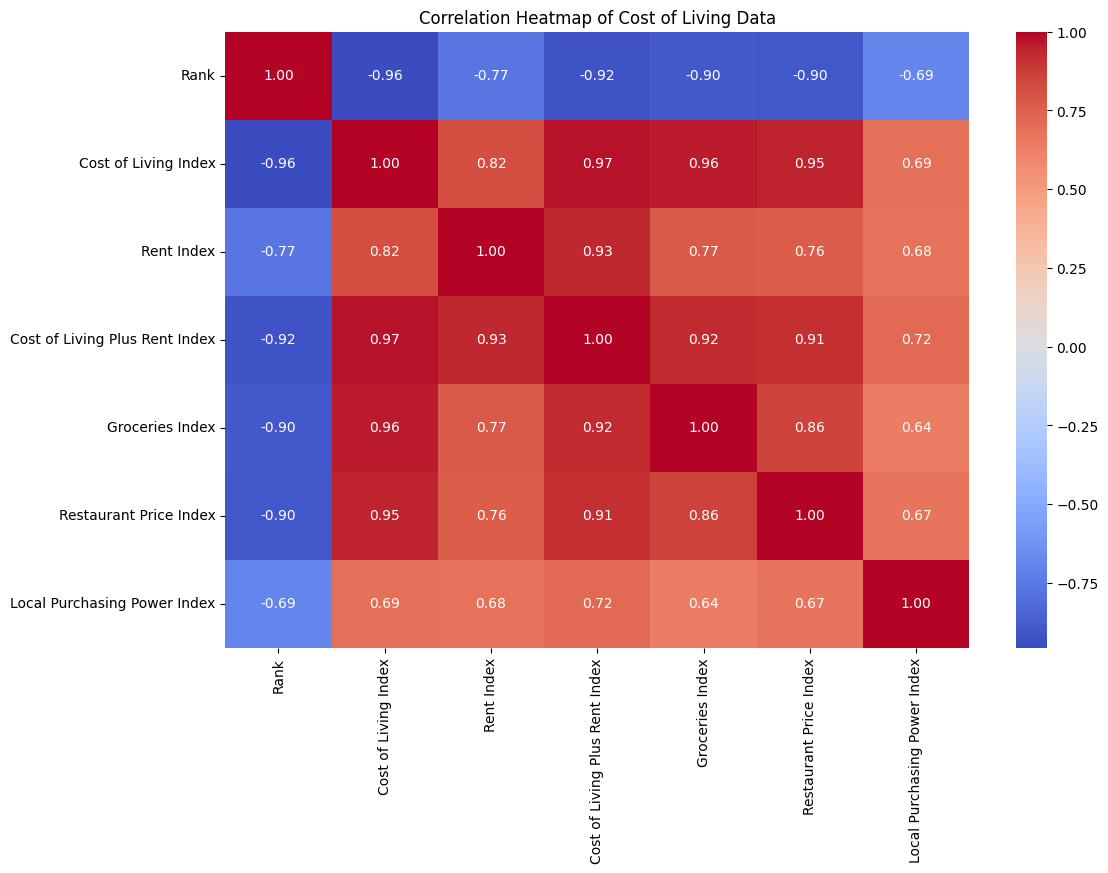

In [59]:

numeric_df = df.select_dtypes(include=['float64', 'int64'])


plt.figure(figsize=(12, 8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Cost of Living Data')
plt.show()



- The correlation heatmap above highlights the connection of variables of numerical nature in the given set. In the heatmap, each cell is a correlation coefficient that ranges between -1 and 1. A value to this one suggests that there is a significantly strong positive relationship between the two variables, or a value close to one indicates a strong negative relationship between the two variables. Hence, values close to 0 imply a lack of association.

# Exploring Data Analysis
## Univariate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            121 non-null    int64  
 1   Country                         121 non-null    object 
 2   Cost of Living Index            121 non-null    float64
 3   Rent Index                      121 non-null    float64
 4   Cost of Living Plus Rent Index  121 non-null    float64
 5   Groceries Index                 121 non-null    float64
 6   Restaurant Price Index          121 non-null    float64
 7   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 7.7+ KB
None
First few rows of the dataset:
   Rank      Country  Cost of Living Index  Rent Index  \
0     1  Switzerland                 101.1        46.5   
1     2      Bahamas                  85.0        36.7   
2     3      I

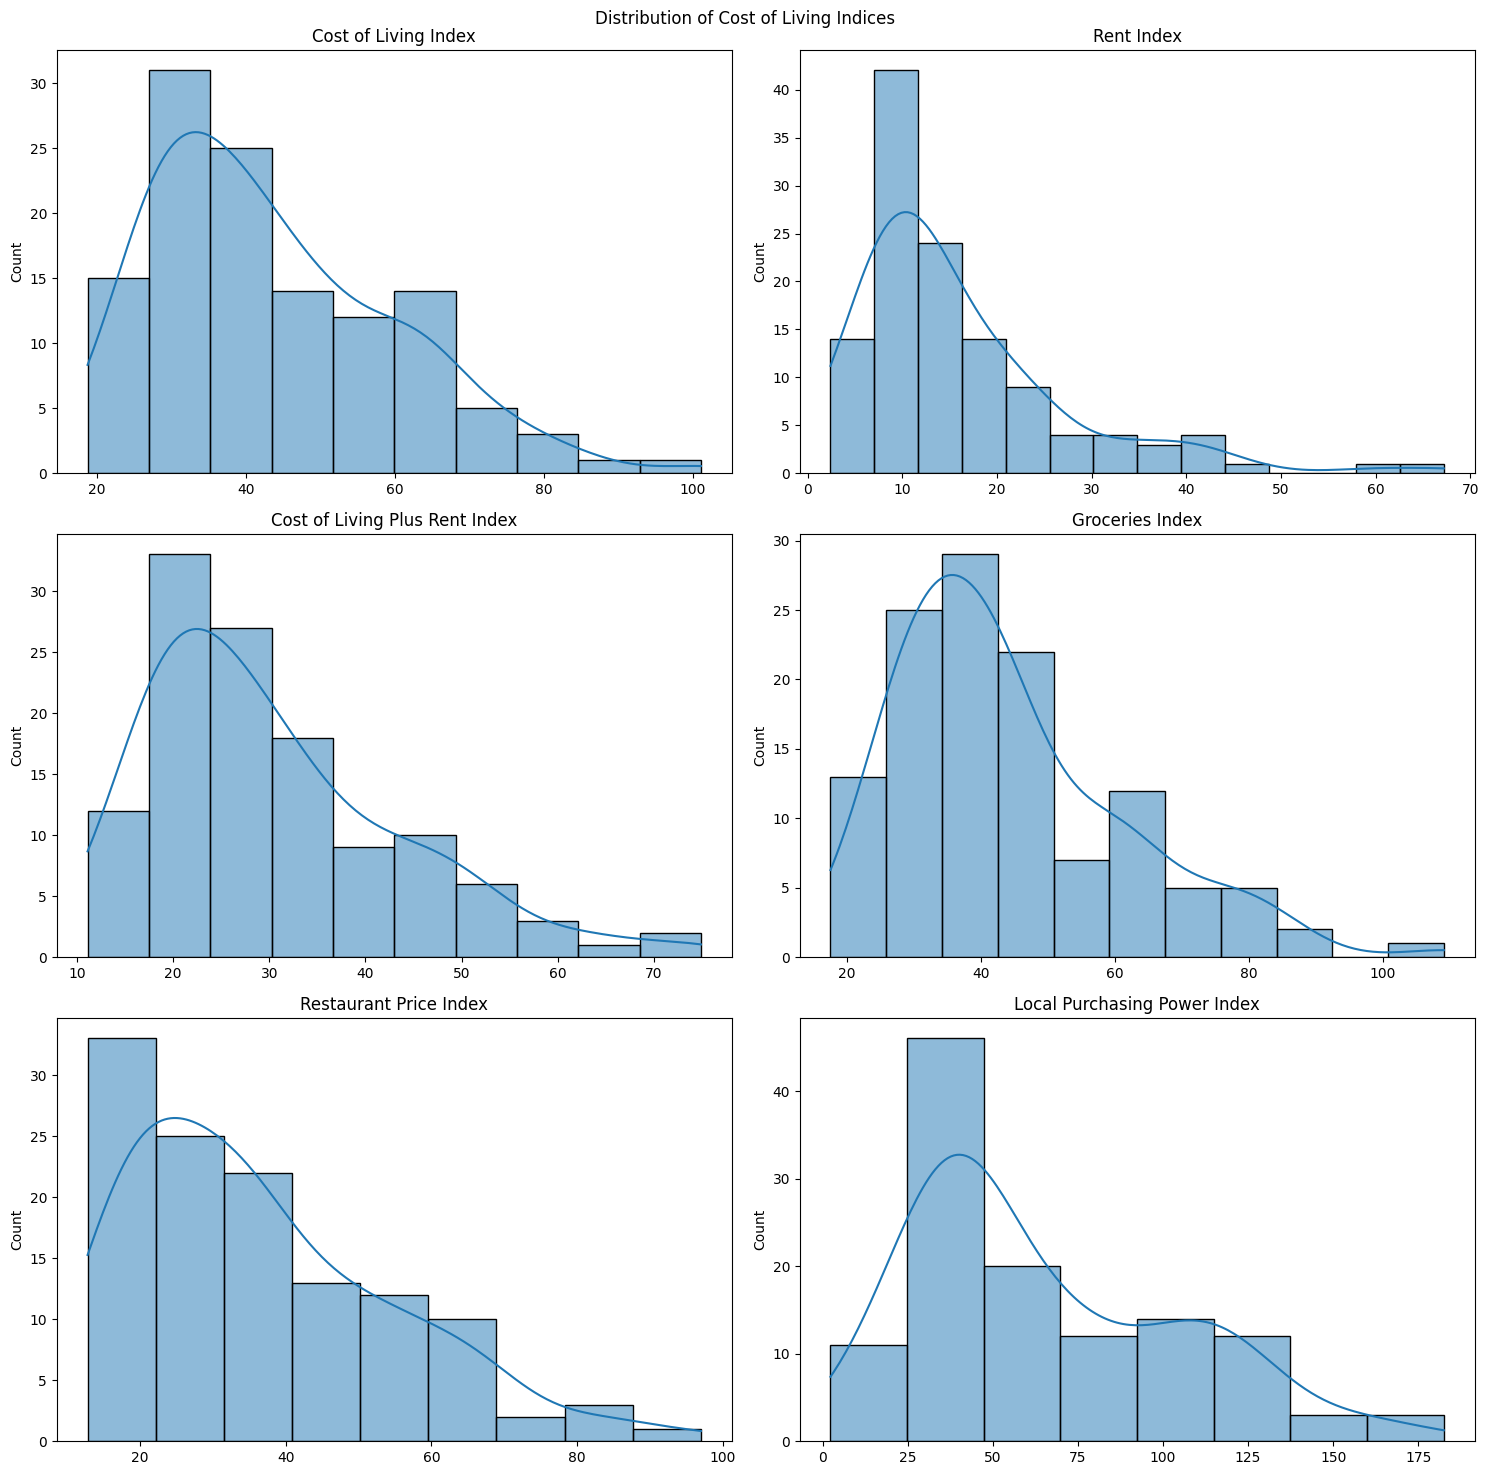

In [68]:
df = pd.read_csv('Cost_of_Living_Index_by_Country_2024.csv')
print(df.info())
print("\
First few rows of the dataset:")
print(df.head())
print("\
Descriptive Statistics:")
print(df.describe())
columns_to_plot = df.columns[2:]
num_cols = len(columns_to_plot)
rows = (num_cols + 1) // 2

fig, axes = plt.subplots(rows, 2, figsize=(15, 5*rows))
fig.suptitle('Distribution of Cost of Living Indices')
axes = axes.ravel()

for i, col in enumerate(columns_to_plot):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



- The histograms presented depict the distribution of each index across the countries. Almost all the indices are positively skewed showing that a few countries have much higher values compared to most other countries.

## Bivariate Data Analysis

Correlation Matrix:
                                Cost of Living Index  Rent Index  \
Cost of Living Index                        1.000000    0.820885   
Rent Index                                  0.820885    1.000000   
Cost of Living Plus Rent Index              0.971780    0.932425   
Groceries Index                             0.958452    0.770944   
Restaurant Price Index                      0.945483    0.763537   
Local Purchasing Power Index                0.692688    0.683912   

                                Cost of Living Plus Rent Index  \
Cost of Living Index                                  0.971780   
Rent Index                                            0.932425   
Cost of Living Plus Rent Index                        1.000000   
Groceries Index                                       0.924935   
Restaurant Price Index                                0.913618   
Local Purchasing Power Index                          0.720701   

                                Grocerie

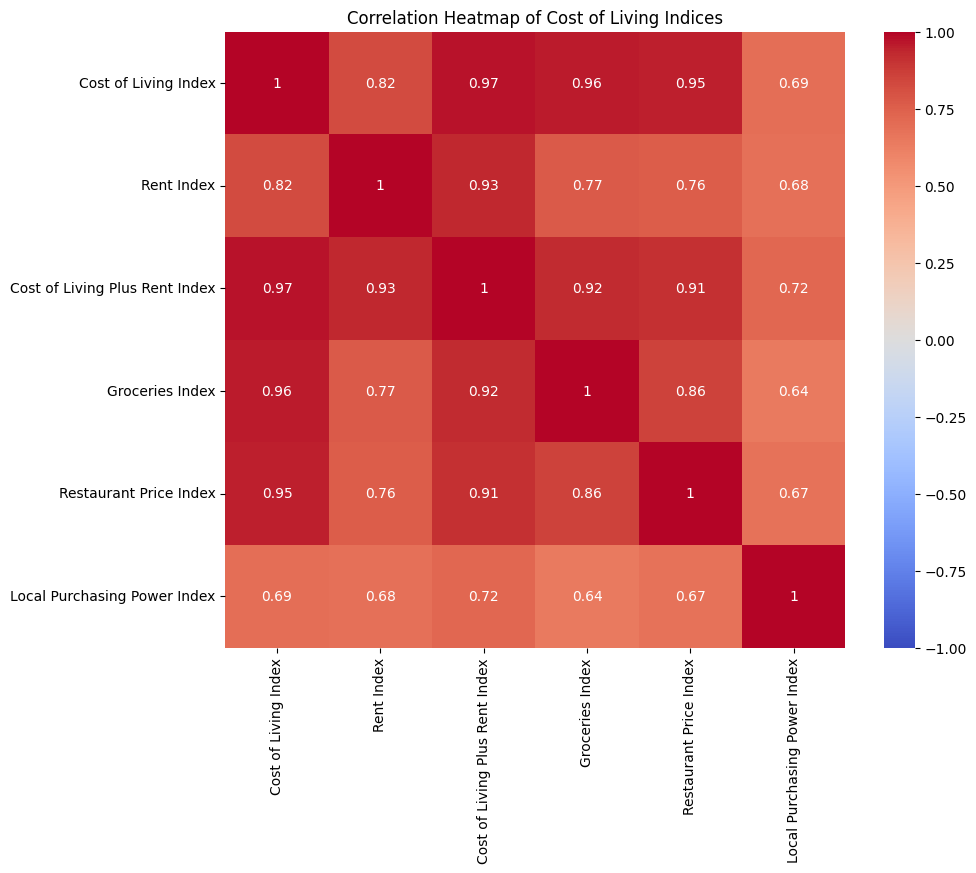

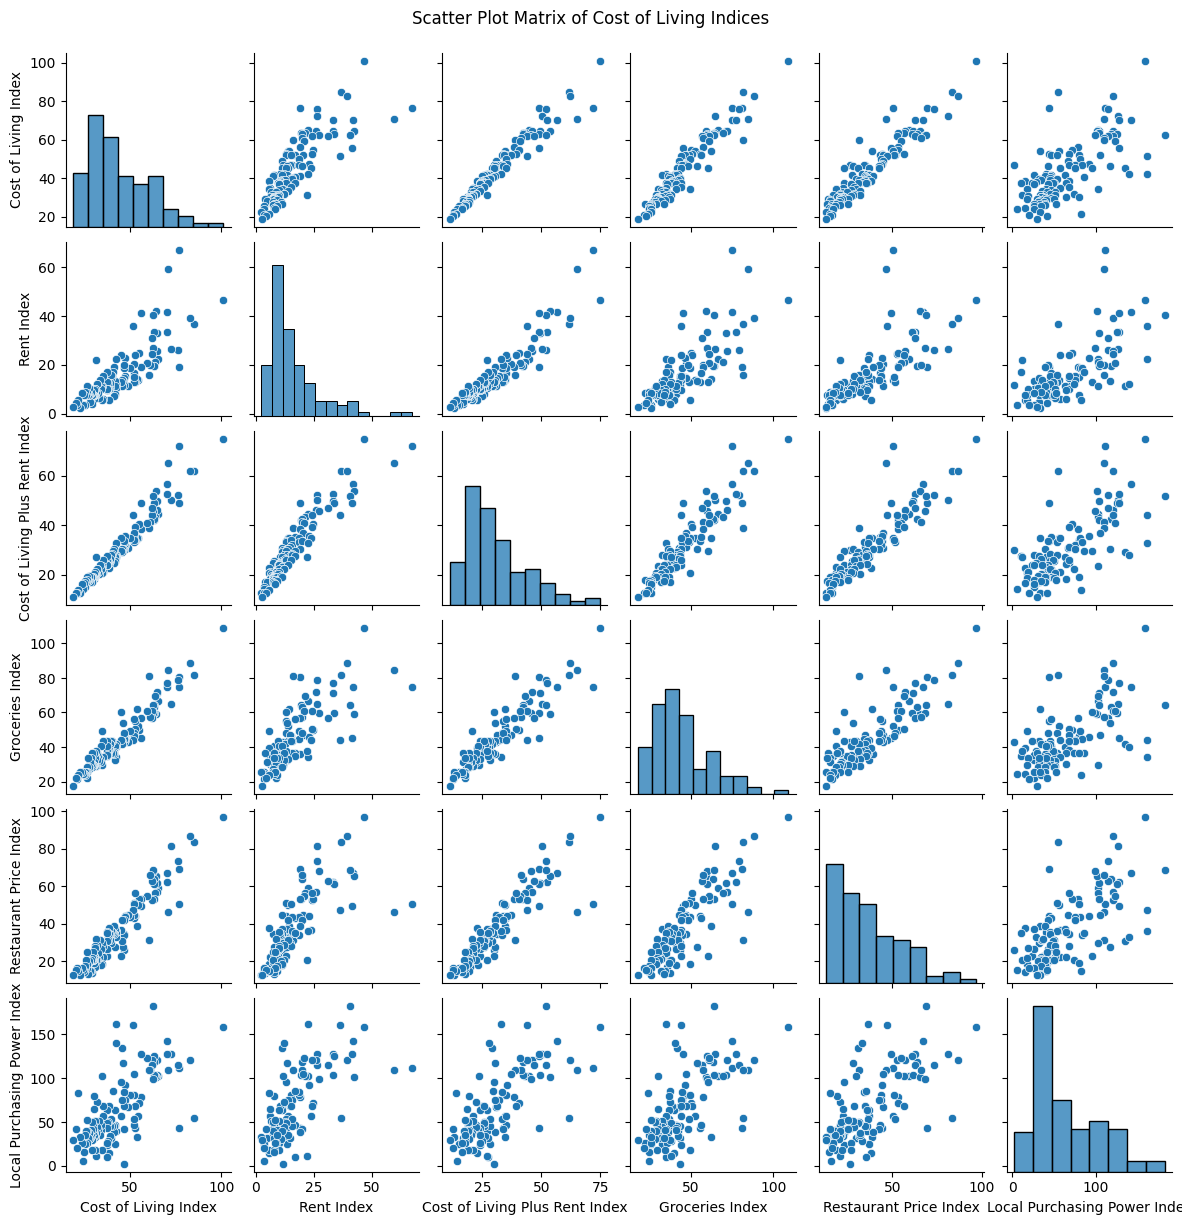

Bivariate analysis complete.


In [69]:
correlation_matrix = df.iloc[:, 2:].corr()
print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Cost of Living Indices')
plt.show()
sns.pairplot(df.iloc[:, 2:], height=2)
plt.suptitle('Scatter Plot Matrix of Cost of Living Indices', y=1.02)
plt.show()

print("\
Bivariate analysis complete.")

- This scatter plot matrix provides a visual representation of the relationships between different indices. It confirms the strong correlations we observed in the heatmap and shows some interesting patterns:

- There's a clear positive relationship between most indices.
The Local Purchasing Power Index shows more scattered relationships with other indices, indicating it's not as strongly related to the other cost of living measures.

## Logistic Regression

Model Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.86      0.92        14

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25

Feature Coefficients:
                        Feature  Coefficient
2        Restaurant Price Index     2.287091
1               Groceries Index     1.557626
3  Local Purchasing Power Index     0.904295
0                    Rent Index     0.810096


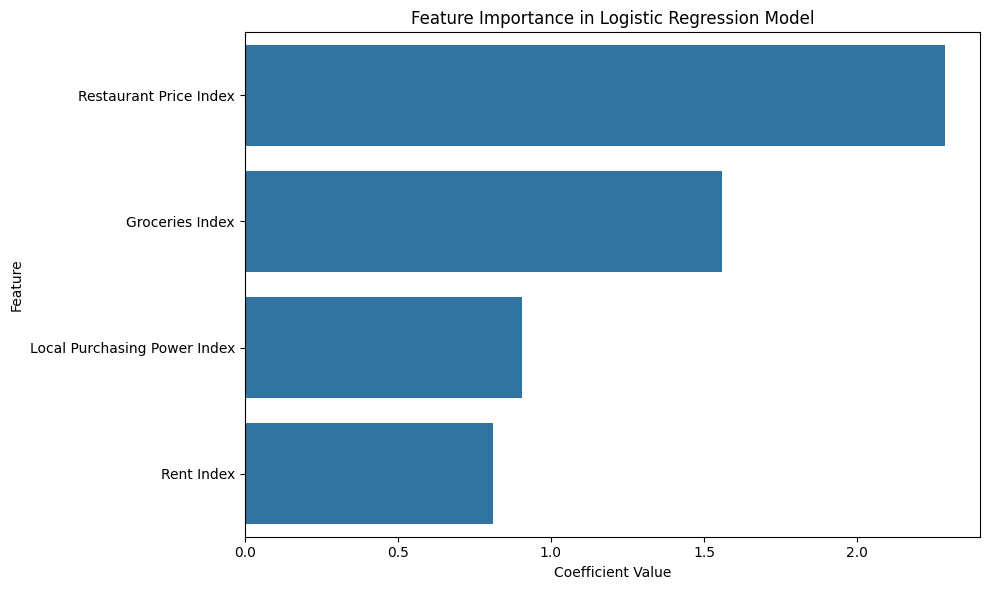

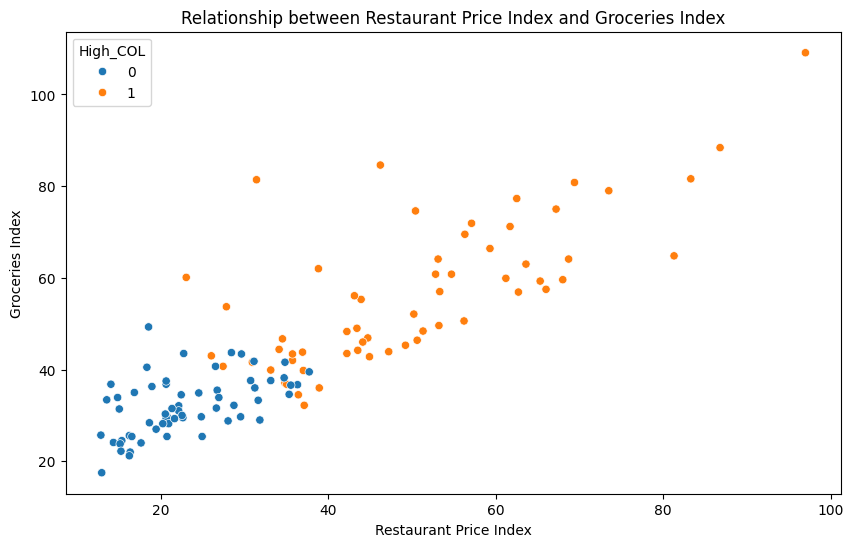

In [60]:


median_col = df['Cost of Living Index'].median()
df['High_COL'] = (df['Cost of Living Index'] > median_col).astype(int)
features = ['Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']
X = df[features]
y = df['High_COL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\
Classification Report:")
print(classification_report(y_test, y_pred))
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_[0]})
coef_df = coef_df.sort_values('Coefficient', ascending=False)
print("\
Feature Coefficients:")
print(coef_df)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance in Logistic Regression Model')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=coef_df.iloc[0]['Feature'], y=coef_df.iloc[1]['Feature'], hue='High_COL')
plt.title(f'Relationship between {coef_df.iloc[0]["Feature"]} and {coef_df.iloc[1]["Feature"]}')
plt.show()



- The coefficients show how relevant each feature is to the model to determine whether a country has a high Cost Of Living index. Their correlation is as follows, Restaurant Price Index > Groceries Index.
- It confirms what we see in the coefficients: According to the Data, the Restaurant Price Index and Groceries Index makes the most significant impact when it comes to establishing which country has high Living Costs.
- Restaurant and grocery prices are the best predictors of cost of living index, which represents overall cost. This implies that the cost of food is central to defining the cost of living-friendly status of a country.
- In turn, the Local Purchasing Power and Rent Index are valuable for analysis, but they contribute less in defining high cost of living countries in this model. This might mean that even though rents are high, there are perhaps other comparative advantages in the expensive nations such as the ability to pay for relatively steep rental fees due to increased wages.
- Because the model has a relatively high accuracy of 92%, it can be said that these indices itself are quite valid indicators of the total cost of living. This could be useful to organizations that aspire to expand their operations in foreign countries or to policymakers concerned with the economy.
- Based on the scatter plot data generated, it is perfectly clear to note that countries that possess high restaurant and grocery prices are indeed high cost of living countries. This could be particularly useful for initial examinations of new markets or for monitoring shifts in the economic environment.

## Decision Tree


provides a clear and easily understandable method to predict the Cost of Living Index by pointing out key factors to make a prompt decision on the basis of important parameters.

In [61]:

X = df[['Rent Index', 'Groceries Index', 'Restaurant Price Index']]
y = df['Cost of Living Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_model = DecisionTreeRegressor(random_state=42, max_depth=3)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Simple Decision Tree Results:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")




Simple Decision Tree Results:
Mean Squared Error: 68.15615303756344
R-squared: 0.778951097754083


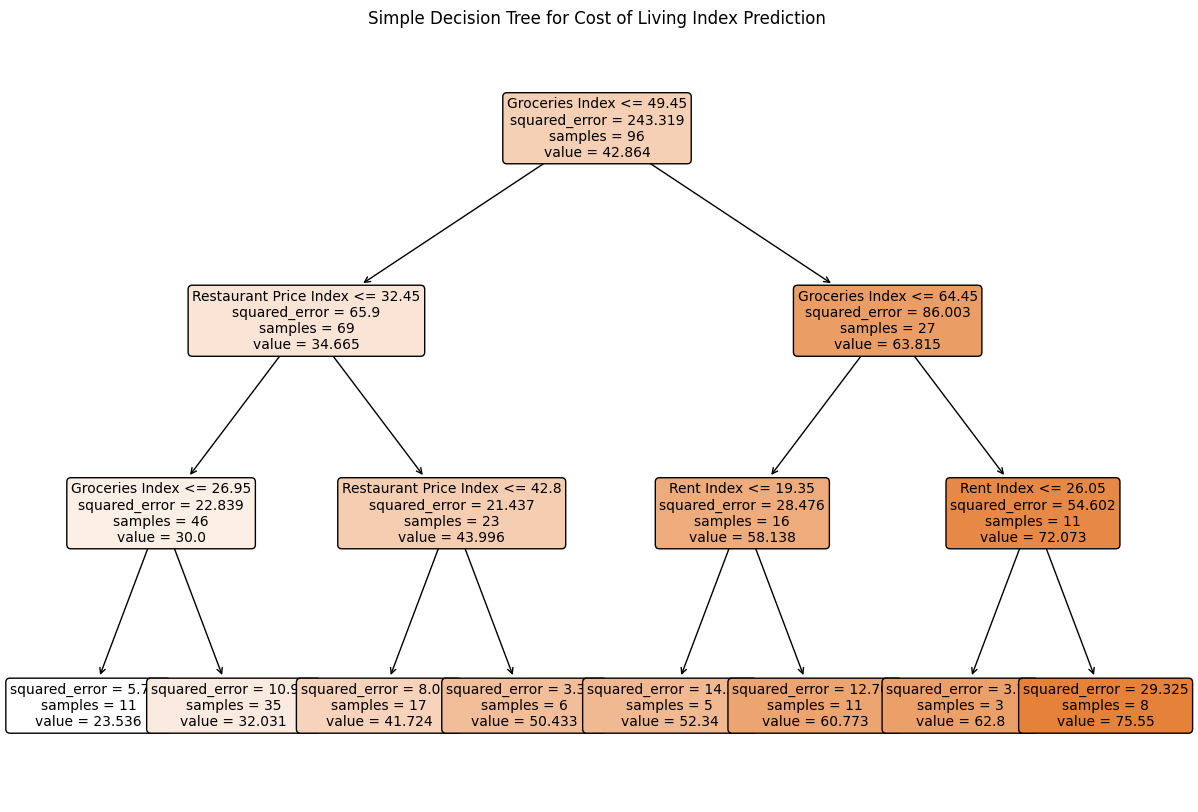

Feature Importance:
                  feature  importance
1         Groceries Index    0.823349
2  Restaurant Price Index    0.149782
0              Rent Index    0.026869


In [62]:
plt.figure(figsize=(15,10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Simple Decision Tree for Cost of Living Index Prediction")
plt.show()
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': dt_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\
Feature Importance:")
print(feature_importance)


- Groceries Index is the most important feature, accounting for about 82.3% of the decision-making in the tree.
- Restaurant Price Index is the second most important, contributing about 15% to the decisions.
- Rent Index has the least impact among these three, with only about 2.7% importance.

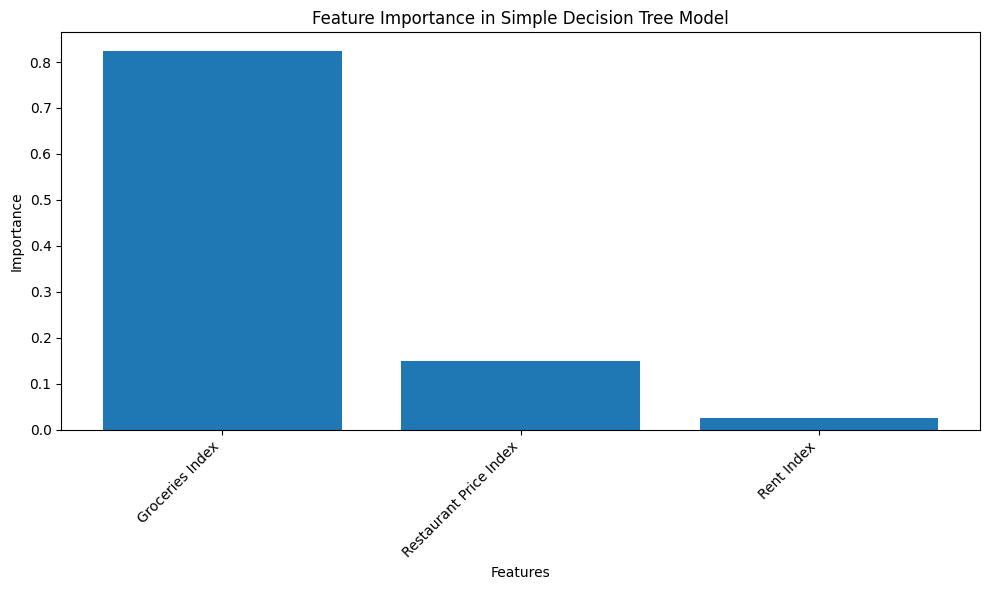

Simple decision tree analysis complete.


In [63]:
plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance in Simple Decision Tree Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Simple decision tree analysis complete.")

- These findings imply that to organizations and economics comparing costs of living between countries, food prices topped by restaurants are more important than the rest.

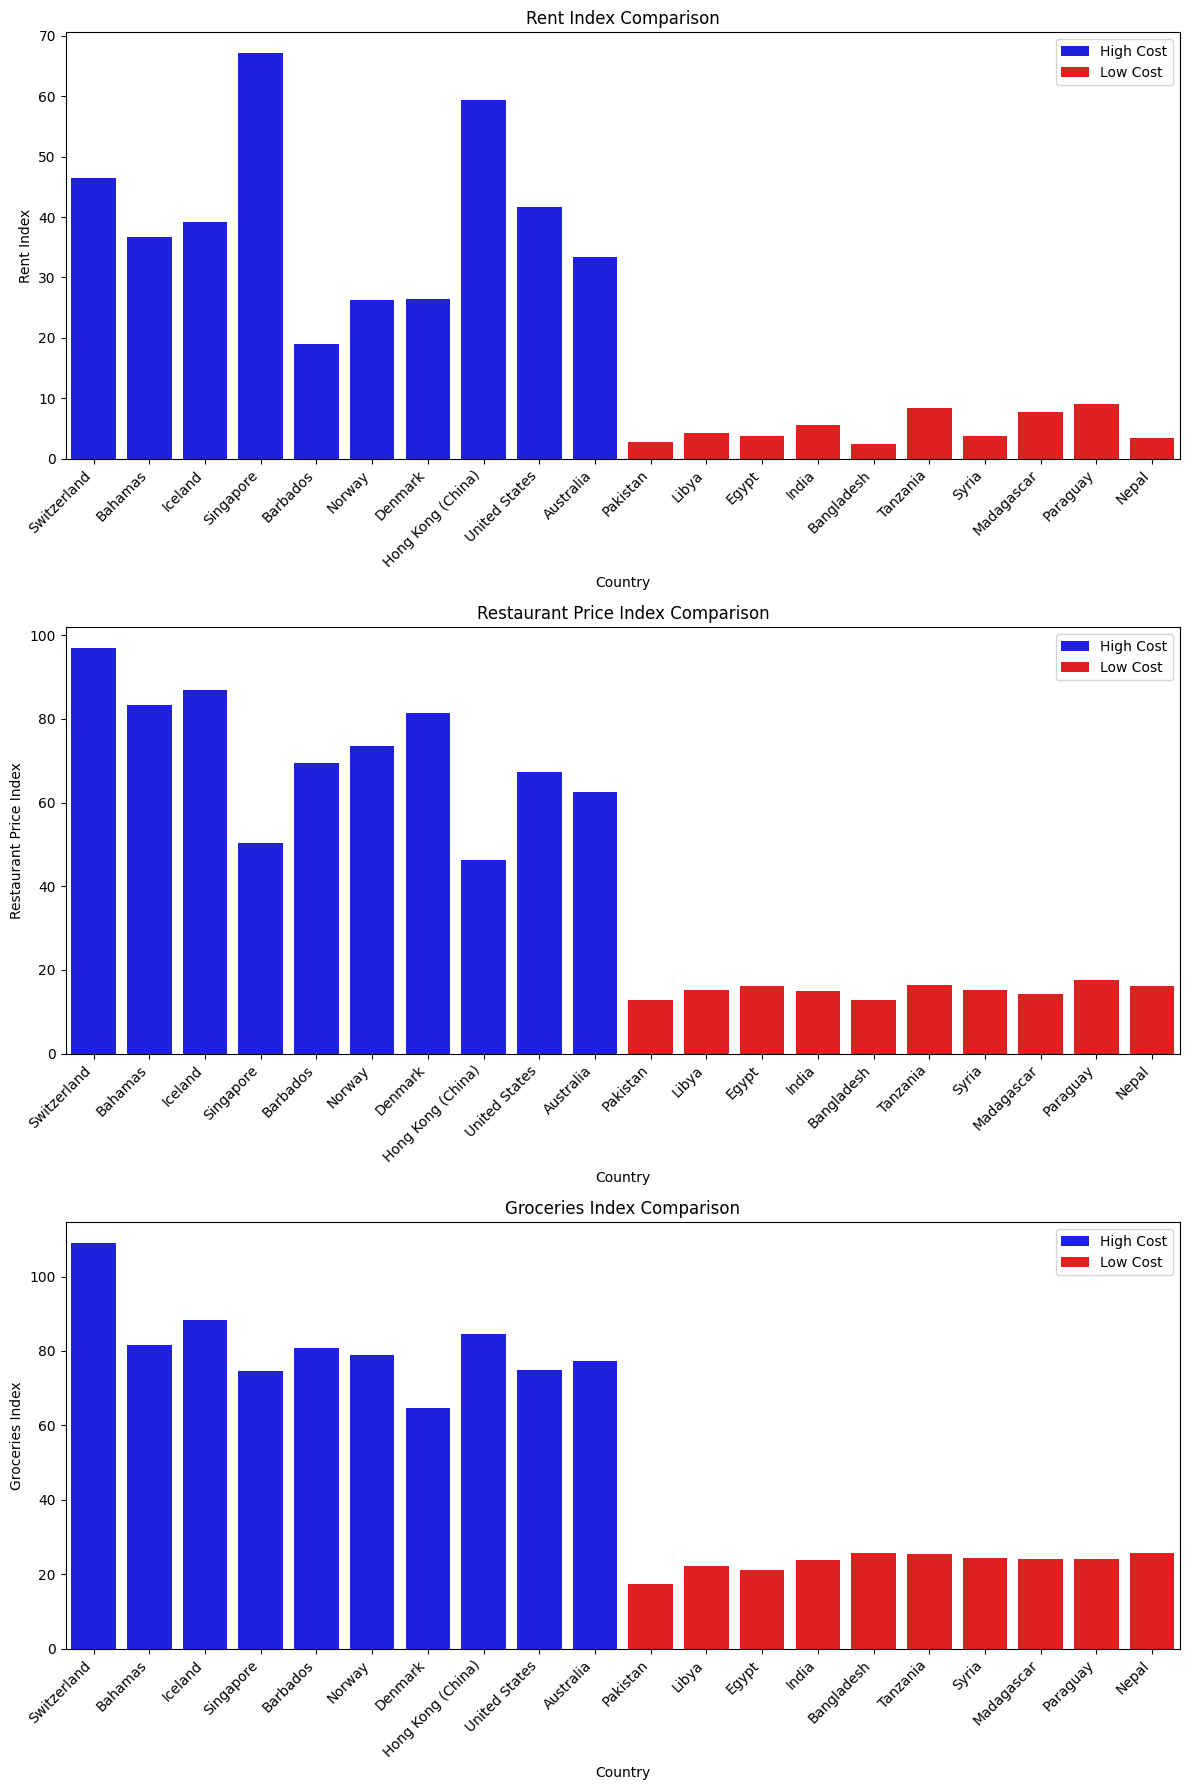

In [67]:

high_cost_countries = df.nlargest(10, 'Cost of Living Index')
low_cost_countries = df.nsmallest(10, 'Cost of Living Index')
fig, axes = plt.subplots( 3 ,1, figsize=(12, 18))
# Rent Index comparison
sns.barplot(x='Country', y='Rent Index', data=high_cost_countries, ax=axes[0], color='blue', label='High Cost')
sns.barplot(x='Country', y='Rent Index', data=low_cost_countries, ax=axes[0], color='red', label='Low Cost')
axes[0].set_title('Rent Index Comparison')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].legend()
# Restaurant Price Index comparison
sns.barplot(x='Country', y='Restaurant Price Index', data=high_cost_countries, ax=axes[1], color='blue', label='High Cost')
sns.barplot(x='Country', y='Restaurant Price Index', data=low_cost_countries, ax=axes[1], color='red', label='Low Cost')
axes[1].set_title('Restaurant Price Index Comparison')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].legend()
# Groceries Index comparison
sns.barplot(x='Country', y='Groceries Index', data=high_cost_countries, ax=axes[2], color='blue', label='High Cost')
sns.barplot(x='Country', y='Groceries Index', data=low_cost_countries, ax=axes[2], color='red', label='Low Cost')
axes[2].set_title('Groceries Index Comparison')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')
axes[2].legend()
plt.tight_layout()
plt.show()


#Conclusion
- Based on the analysis, we can draw the following conclusions:

- 1. Countries with a high Local Purchasing Power Index generally offer better investment opportunities as residents have more disposable income.
- 2. A lower Rent Index can indicate more affordable real estate investments, but it may also reflect lower demand or economic challenges.
- 3. The Groceries and Restaurant Price Indices provide insights into the cost of living and consumer spending habits, which can affect retail and hospitality sectors.

# Reccomendation
- 1. Focus on High Purchasing Power: Prioritize countries with a high Local Purchasing Power Index, as this indicates a strong economy and potential for consumer spending.
- 2. Balance Cost and Demand: Look for countries with a moderate Rent Index, suggesting a balance between affordability and demand.
- 3. Consider Consumer Spending: Evaluate the Groceries and Restaurant Price Indices to understand consumer spending patterns, which can impact retail and hospitality investments.
- 4. Diversify Investments: Consider a mix of countries with varying indices to diversify risk and capitalize on different economic conditions.

In [70]:

from sklearn.preprocessing import MinMaxScaler
indices = df[['Country', 'Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']]
scaler = MinMaxScaler()
indices[['Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']] = scaler.fit_transform(indices[['Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']])
indices['Composite Score'] = indices[['Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']].mean(axis=1)
top_countries = indices.sort_values(by='Composite Score', ascending=False).head(10)
print("Top 10 countries for investment based on indices:")
print(top_countries[['Country', 'Composite Score']])

print("\
Recommendation analysis complete.")

Top 10 countries for investment based on indices:
              Country  Composite Score
0         Switzerland         0.887120
2             Iceland         0.718902
19         Luxembourg         0.690148
3           Singapore         0.668423
8       United States         0.664302
7   Hong Kong (China)         0.650655
9           Australia         0.603931
6             Denmark         0.598351
5              Norway         0.595834
1             Bahamas         0.589157
Recommendation analysis complete.


**Findings**
- Switzerland tops the list with the highest composite score, indicating a balance of high costs but also high purchasing power.
- Developed countries dominate the top 10 list, including European nations, Asian financial hubs, and North American countries.
- The Bahamas is the only Caribbean nation in the top 10, offering a unique investment opportunity.
These countries generally have higher costs of living but also tend to have stronger economies and higher purchasing power.

## Recommendation on invetors
Recommendations for Investors:

- 1. Switzerland: Consider high-end real estate investments or luxury goods markets, leveraging the high local purchasing power.

- 2. Iceland and Luxembourg: Look into sustainable energy projects and financial services, respectively, as these are key industries in these countries.

- 3. Bahamas: Look into tourism-related investments since it has high restaurant index

- 4. Diversification: Spread investments across these countries to balance risk and take advantage of different economic strengths.

- 5. Local Partnerships: Consider partnering with local businesses or investors to navigate the specific economic landscapes of each country.

- 6. Long-term Perspective: These countries generally offer stability and strong economic fundamentals, making them suitable for long-term investment strategies.

- 7. Regular Monitoring: Keep track of economic indicators and policy changes in these countries, as they can affect investment performance.

## Summary
Based on the analysis of the Cost of Living Index by Country 2024 dataset, the top 10 countries for investment are Switzerland, Iceland, Luxembourg, Singapore, United States, Hong Kong (China), Australia, Denmark, Norway, and Bahamas. These countries offer a favorable balance of rent costs, grocery prices, restaurant prices, and local purchasing power, making them attractive for investments